In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load data

def load_list(filename):
    vocabulary = []
    with open(filename, 'r') as f:
        for l in f:
            vocabulary.append(l.strip())
    return np.asarray(vocabulary)

def load_csv(filename):
    import csv
    
    sentence = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            sentence.append(str(row))
    return np.asarray(sentence).flatten()
    
import pickle

def save_pickle(path, X):
    with open(path, 'wb') as f:
        pickle.dump(X, f)
def open_pickle(path):
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

X_train_sent = open_pickle('./sentence_data/imdb_sentence_xtrain.pickle')
X_test_sent = open_pickle('./sentence_data/imdb_sentence_xtest.pickle')
y_train = open_pickle('./sentence_data/imdb_sentence_ytrain.pickle')
y_test = open_pickle('./sentence_data/imdb_sentence_ytest.pickle')

In [3]:
X = np.hstack((X_train_sent, X_test_sent))
y = np.hstack((y_train, y_test))
# X.shape
y.shape

(2000,)

In [4]:
X_rel = X[y==1]
X_unrel = X[y==0]

X_rel.shape

(1000,)

In [5]:
X_rel_sent = np.zeros(len(X_rel))
X_unrel_sent = np.zeros(len(X_unrel))

for i in range(len(X_rel_sent)):
    X_rel_sent[i] = len(X_rel[i].split())

for i in range(len(X_unrel_sent)):
    X_unrel_sent[i] = len(X_unrel[i].split())

def print_word_stat(title, X):
    print()
    print('--', title, 'Statistics --')

    print('Total sentences ', len(X))
    print('Max \t: ', int(np.max(X)))
    print('Min \t: ', int(np.min(X)))
    print('Mean \t: ', int(np.mean(X)))
    print('Median \t: ', int(np.median(X)))
    print()

# print_word_stat('Whole corpus', X_sent_len)
print_word_stat('Related Sentence', X_rel_sent)
print_word_stat('Unrelated Sentence', X_unrel_sent)



-- Related Sentence Statistics --
Total sentences  1000
Max 	:  84
Min 	:  1
Mean 	:  15
Median 	:  13


-- Unrelated Sentence Statistics --
Total sentences  1000
Max 	:  109
Min 	:  1
Mean 	:  17
Median 	:  15



In [6]:
from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
tf_vectorizer = CountVectorizer(lowercase=True, max_df=1.0, min_df=1, binary=True, token_pattern=token)
tf_vectorizer.set_params(ngram_range=(1,1))

X_train = tf_vectorizer.fit_transform(X_train_sent)
X_test = tf_vectorizer.transform(X_test_sent)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.33, random_state=42)

In [7]:
words = tf_vectorizer.get_feature_names()
print(len(words))
# print(words[500:600])

4532


In [8]:
print(y_train.shape)
print(y_test.shape)

(1333,)
(667,)


In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [10]:
def lr_classifier_report(X_tr, y_tr, X_te, y_te, random_state=42, C=1.0):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import classification_report
    import matplotlib.pyplot as plt

    clf = LogisticRegression(random_state=random_state, C=C)
    clf.fit(X_tr, y_tr)

    y_predict = clf.predict(X_te)

    print('--------------')
    print('C=%.2f' %(C))
    print('--------------')
    print('Accuracy')
    print('Train:\t%.5f ' %(clf.score(X_tr, y_tr)))
    print('Test:\t%.5f ' %(clf.score(X_te, y_te)))
    
    print(classification_report(y_te,y_predict))
    #############################################################################
    y_score = clf.decision_function(X_te)
    
    precision, recall, _ = precision_recall_curve(y_te, y_score)
    average_precision = average_precision_score(y_te, y_score)
    
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    plt.show()
    plt.clf()
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_te, y_score)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return clf

--------------
C=1.00
--------------
Accuracy
Train:	0.98575 
Test:	0.75562 
             precision    recall  f1-score   support

        0.0       0.80      0.73      0.76       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



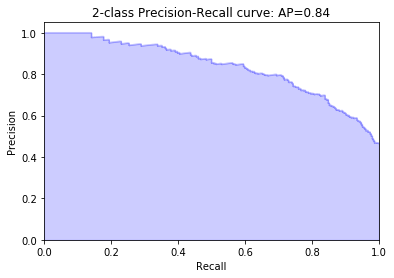

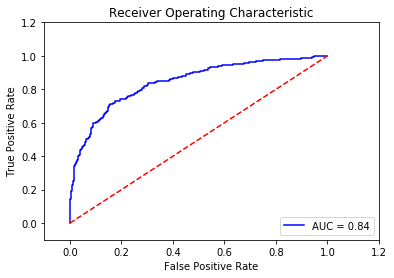

In [11]:
clf1 = lr_classifier_report(X_train, y_train, X_test, y_test, C=1.0)

--------------
C=0.10
--------------
Accuracy
Train:	0.88897 
Test:	0.75862 
             precision    recall  f1-score   support

        0.0       0.80      0.74      0.77       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



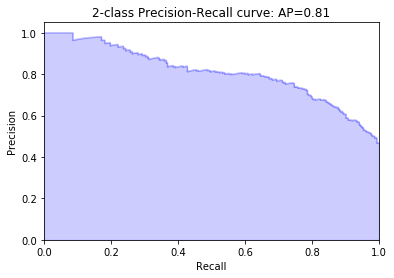

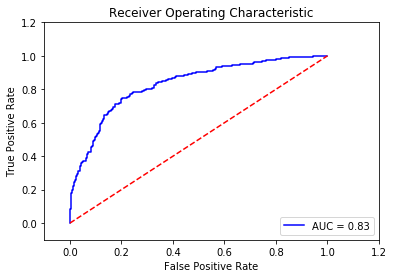

In [12]:
clf2 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.1)

--------------
C=0.01
--------------
Accuracy
Train:	0.76819 
Test:	0.69415 
             precision    recall  f1-score   support

        0.0       0.77      0.63      0.69       363
        1.0       0.64      0.77      0.70       304

avg / total       0.71      0.69      0.69       667



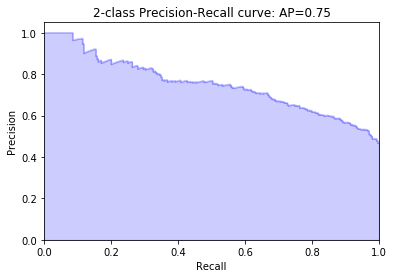

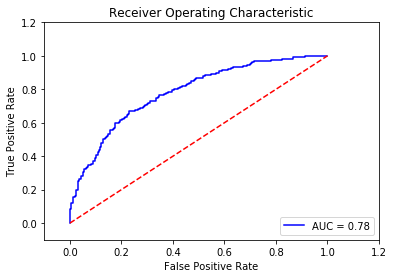

In [13]:
clf3 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.01)

--------------
C=0.00
--------------
Accuracy
Train:	0.70893 
Test:	0.63268 
             precision    recall  f1-score   support

        0.0       0.81      0.42      0.56       363
        1.0       0.56      0.88      0.69       304

avg / total       0.70      0.63      0.62       667



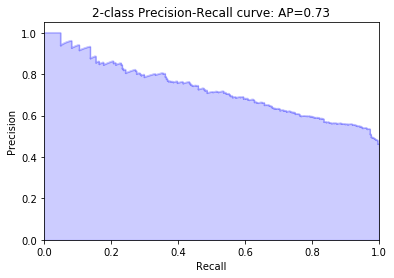

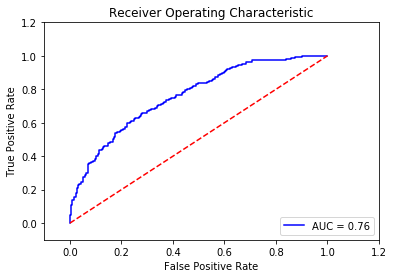

In [14]:
clf3 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.001)

In [15]:
weights = clf3.coef_.flatten()


def negative_positive_counts(X, y, word_index):
    neg_count = np.sum(X[y==0, word_index])
    pos_count = np.sum(X[y==1, word_index])    
    return neg_count, pos_count

In [16]:
not_related_indices = np.argsort(weights)
related_indices = not_related_indices[::-1]

print("word\tweight\trelated\tunrelated")
for i in not_related_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
in	-0.04	108	178
to	-0.03	158	209
he	-0.02	11	59
on	-0.02	55	92
who	-0.02	23	61
the	-0.02	331	353
when	-0.02	18	50
into	-0.01	5	32
his	-0.01	21	45
from	-0.01	28	50


In [17]:
print("word\t\tweight\trelated\tunrelated")
for i in related_indices[:30]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word		weight	related	unrelated
this		0.07	281	124
movie		0.05	184	67
is		0.05	281	160
film		0.03	136	63
it		0.03	185	122
good		0.01	43	11
very		0.01	39	8
great		0.01	35	9
but		0.01	79	51
all		0.01	60	34
ever		0.01	31	6
watch		0.01	32	9
was		0.01	117	90
that		0.01	126	100
i		0.01	215	184
one		0.01	68	47
acting		0.01	19	2
recommend		0.01	17	0
worst		0.01	19	2
bad		0.01	23	6
actor		0.01	17	1
worth		0.01	16	0
best		0.01	24	8
most		0.01	22	7
well		0.01	22	7
scene		0.01	23	8
seen		0.01	29	13
plot		0.01	25	10
you		0.01	64	47
awful		0.01	14	0


In [18]:
abs_indices = np.argsort(np.absolute(weights))[::-1]

print("word\tweight\trelated\tunrelated")
for i in abs_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
this	0.07	281	124
movie	0.05	184	67
is	0.05	281	160
in	-0.04	108	178
film	0.03	136	63
to	-0.03	158	209
it	0.03	185	122
he	-0.02	11	59
on	-0.02	55	92
who	-0.02	23	61


In [19]:
clf2.classes_

array([0., 1.])

In [20]:
y_class = clf2.predict_proba(X_test)

for target in y_class:
    if target[1] > 0.9:
        print(target[1])

0.9030288387742158
0.9278437458117518
0.9320359314775554
0.931334171135712
0.9106035275887772
0.9046594636613434
0.9292979728745767
0.9176841334433236
0.9036295603754653
0.9294447357494527
0.979451851149098
0.915961115546778
0.9016802948218259
0.932509396874115
0.9273596405730732
0.9197384264780087
0.9348721663693018
0.9275444754623536
0.958131124509027
0.9135435684551974
0.9164795347684342
0.922291553948335
0.929011945531871


## P(related|sentence) and Count

### Threshold 0.5, 0.9, 0.99

In [21]:
def get_sentences(corpus):
    from textblob import TextBlob
    text = TextBlob(corpus)
    i = 0
    sent = []
    for sentence in text.raw_sentences:
        sent.append(sentence)
    return sent

def count_related_sentence(clf, cv, X, threshold=None):
    count = []
    
    for corpus in X:
        sentences = get_sentences(corpus)
        sentence_set = cv.transform(sentences)
        
        if threshold==None:
            y = clf.predict(sentence_set)
            count.append(int(np.sum(y)))
        else:
            # class ['0', '1']
            y_classes = clf.predict_proba(sentence_set)
            count.append(int(np.sum(y_classes[:,1]>threshold)))
    return count

def summary_count(count):
    max_count = np.max(count)    
    summary = np.zeros(max_count+1, dtype=np.int)
    
    for item in count:
        summary[item] += 1
        
    return summary

# Load data
X_te_clean = open_pickle("./pickles/imdb_x_te_clean.pickle")
y_te = open_pickle("./pickles/imdb_y_te.pickle")

In [22]:
# no threshold
count = count_related_sentence(clf2, tf_vectorizer, X_te_clean)
summary = summary_count(count)

# for i, cnt in enumerate(summary):
#     print('%d' %(cnt))

514
1848
3002
3739
3649
3124
2584
1870
1311
929
646
440
343
267
180
134
100
76
71
34
27
30
20
11
9
15
6
3
2
1
4
4
1
2
2
0
1
0
0
0
0
1


In [23]:
count_threshold1 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.75)
summary = summary_count(count_threshold1)
for i, cnt in enumerate(summary):
    print('%d' %(cnt))

6360
7754
5482
2985
1334
615
263
102
60
24
11
5
2
1
1
0
1


In [24]:
count_threshold1 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.85)
summary = summary_count(count_threshold1)
for i, cnt in enumerate(summary):
    print('%d' %(cnt))

14361
7331
2421
662
169
48
4
3
1


In [25]:
count_threshold2 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.9)
summary = summary_count(count_threshold2)
for i, cnt in enumerate(summary):
    print('%d' %(cnt))

19523
4543
810
104
17
2
1


In [26]:
count_threshold3 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.99)
summary = summary_count(count_threshold3)
for i, cnt in enumerate(summary):
    print('%d' %(cnt))

24965
35


In [27]:
cnt = np.asarray(count)
ind = np.argsort(cnt)[::-1]
# X_te_clean[ind[0]]

## Classification +/-

In [28]:
import re

print('load data...')
pos_related = load_csv('./sentence_data/pos_related.csv')
neg_related = load_csv('./sentence_data/neg_related.csv')
  
print(pos_related.shape)
print(neg_related.shape)

print('Stack the data...')

y_pos = np.ones(pos_related.shape)
y_neg = np.zeros(neg_related.shape)

X = np.hstack((pos_related, neg_related))
y = np.hstack((y_pos, y_neg))

# Clean the special characters
for i, x in enumerate(X):
    X[i] = re.sub('[^A-Za-z0-9 ]+', '', X[i])
    
print('Total data :', len(X))
print('Split train-test data...')
import numpy as np
import random

random.seed(42)
param = 2/3
partition = int(len(X) * param)
indices = random.sample(range(len(X)),partition)

X_tr = np.asarray(X[indices])
X_te = np.asarray(np.delete(X,indices))
y_tr = y[indices]
y_te = np.delete(y, indices)

save_pickle('./sentence_data/imdb_sentence_np_xtrain.pickle', X_tr)
save_pickle('./sentence_data/imdb_sentence_np_ytrain.pickle', y_tr)
save_pickle('./sentence_data/imdb_sentence_np_xtest.pickle', X_te)
save_pickle('./sentence_data/imdb_sentence_np_ytest.pickle', y_te)

load data...
(500,)
(500,)
Stack the data...
Total data : 1000
Split train-test data...


In [29]:
X_np_tr = open_pickle("./sentence_data/imdb_sentence_np_xtrain.pickle")
X_np_te = open_pickle("./sentence_data/imdb_sentence_np_xtest.pickle")
y_np_tr = open_pickle("./sentence_data/imdb_sentence_np_ytrain.pickle")
y_np_te = open_pickle("./sentence_data/imdb_sentence_np_ytest.pickle")

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
cv = CountVectorizer(lowercase=True, max_df=1.0, min_df=1, binary=True, token_pattern=token)
cv.set_params(ngram_range=(1,1))

X_np_train = tf_vectorizer.transform(X_np_tr)
X_np_test = tf_vectorizer.transform(X_np_te)

--------------
C=1.00
--------------
Accuracy
Train:	0.99249 
Test:	0.76946 
             precision    recall  f1-score   support

        0.0       0.79      0.72      0.75       163
        1.0       0.75      0.82      0.78       171

avg / total       0.77      0.77      0.77       334



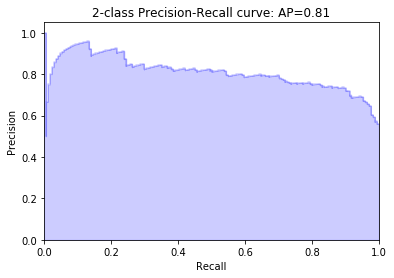

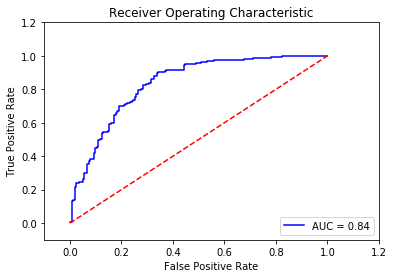

In [31]:
clf_np = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=1)

--------------
C=0.10
--------------
Accuracy
Train:	0.89640 
Test:	0.73054 
             precision    recall  f1-score   support

        0.0       0.74      0.70      0.72       163
        1.0       0.73      0.76      0.74       171

avg / total       0.73      0.73      0.73       334



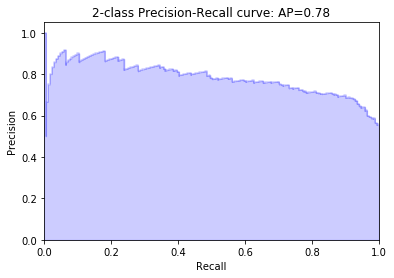

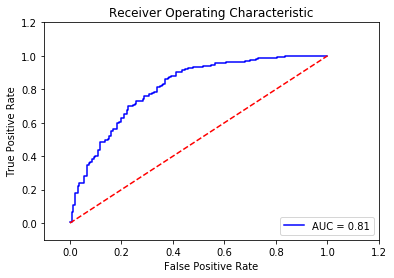

In [32]:
clf_np2 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.1)

--------------
C=0.01
--------------
Accuracy
Train:	0.76577 
Test:	0.68862 
             precision    recall  f1-score   support

        0.0       0.69      0.66      0.67       163
        1.0       0.69      0.72      0.70       171

avg / total       0.69      0.69      0.69       334



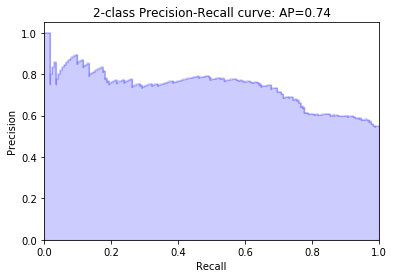

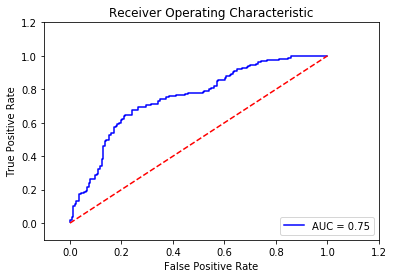

In [33]:
clf_np3 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.01)

--------------
C=0.00
--------------
Accuracy
Train:	0.74324 
Test:	0.68263 
             precision    recall  f1-score   support

        0.0       0.68      0.66      0.67       163
        1.0       0.69      0.70      0.69       171

avg / total       0.68      0.68      0.68       334



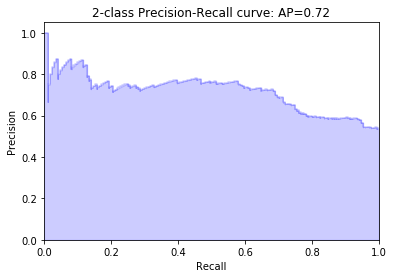

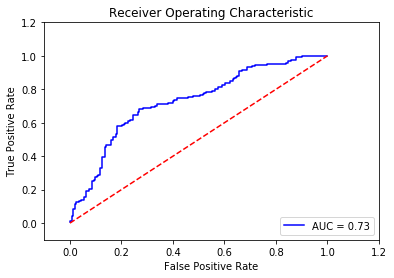

In [34]:
clf_np3 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.001)

## P(n|related), P(p|related)

In [66]:
X_te_clean = open_pickle("./pickles/imdb_x_te_clean.pickle")
y_te = open_pickle("./pickles/imdb_y_te.pickle")

def get_sentences(corpus):
    from textblob import TextBlob
    text = TextBlob(corpus)
    i = 0
    sent = []
    for sentence in text.raw_sentences:
        sent.append(sentence)
    return sent

def nested_classifier(clf, clf_np, cv, X, threshold=None):
    y_pred = []
    for corpus in X:
    
        sentences = get_sentences(corpus)
        sentence_set = cv.transform(sentences)
        
        if threshold==None:
            y_ind = clf.predict(sentence_set)
        else:
            y_ind = clf.predict_proba(sentence_set)
            y_ind = y_ind[:,1]>threshold
        
        # make case when there is no related sentence
        if np.sum(y_ind) == 0:
            y_pred.append(-1)
            continue
        elif np.sum(y_ind) == 1:
            y = clf_np.predict(sentence_set[np.array(np.where(y_ind == 1)).T.flatten(), :])
            y_pred.append(y[0])
        else:
            y_pred.append(-2)
    
    return np.array(y_pred)



In [80]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.5)

# accuracy mong 7754 data which has only one related sentence

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 1848


0.6737012987012987

In [76]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.75)

# accuracy mong 7754 data which has only one related sentence

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 7754


0.6627547072478721

In [77]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.85)

# accuracy mong 7754 data which has only one related sentence

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 7331


0.6752148410858

In [78]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.9)

# accuracy mong 7754 data which has only one related sentence

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 4543


0.6949152542372882

In [79]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.99)

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 35


0.8857142857142857

In [81]:
y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=0.95)

print('total:', (np.sum(y==0) + np.sum(y==1)))
np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

total: 1231


0.7181153533712429

In [85]:
def double_nested_test():
    threshold = np.arange(0.5,1.0,0.02)
    
    for t in threshold:
        y = nested_classifier(clf2, clf_np2, tf_vectorizer, X_te_clean, threshold=t)

        #print('total:', (np.sum(y==0) + np.sum(y==1)))
        #np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))

        print('%.2f\t%d\t%.5f' %(t, (np.sum(y==0) + np.sum(y==1)), np.sum(y == y_te)/(np.sum(y==0) + np.sum(y==1))))
        del y

In [86]:
double_nested_test()

0.50	1848	0.67370
0.52	2129	0.67356
0.54	2468	0.67626


KeyboardInterrupt: 

### Human Recognizeable Terms (1-5 grams)

C:\Users\Anneke Hidayat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


nan

## Other